Data: 

In [36]:
import os

import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [5]:
d_train = pd.read_csv('tmp/prodDefect_classification_6classes_DAI/prodDefect_classification_6classes_DAI_Train/train.csv')
d_test = pd.read_csv('tmp/prodDefect_classification_6classes_DAI/prodDefect_classification_6classes_DAI_Test/test.csv')

print(d_train.shape)
display(d_train.head())

print(d_test.shape)
display(d_test.head())

(1680, 2)


,images,label
0,1.jpg,crazing
1,2.jpg,crazing
2,3.jpg,crazing
3,4.jpg,crazing
4,5.jpg,crazing


(420, 2)


,images,label
0,1441.jpg,crazing
1,1442.jpg,crazing
2,1443.jpg,crazing
3,1444.jpg,crazing
4,1445.jpg,crazing


In [6]:
d_train['label'].value_counts()

crazing           240
inclusion         240
patches           240
pitted_surface    240
rolledin_scale    240
scratches         240
normal            240
Name: label, dtype: int64

In [7]:
d_test['label'].value_counts()

crazing           60
inclusion         60
patches           60
pitted_surface    60
rolledin_scale    60
scratches         60
normal            60
Name: label, dtype: int64

| EN | JP |
| ---- | ---- |
| crazing | ひび割れ |
| inclusion | 包含 |
| patches | パッチ |
| pitted_surface | 穴だらけの表面 |
| rolledin_scale | 巻き込みスケール |
| scratches | 傷 |
| normal | 正常 |

In [12]:
!ls tmp/prodDefect_classification_6classes_DAI/prodDefect_classification_6classes_DAI_Test

images   test.csv


In [32]:
# Train image shape
H, W, C = [], [], []
im_pathes = []
for f in d_train['images']:
    im_path = os.path.join('tmp', 'prodDefect_classification_6classes_DAI', 'prodDefect_classification_6classes_DAI_Train', 'images', f)
    im_pathes.append(im_path)
    im = cv2.imread(im_path)
    H.append(im.shape[0])
    W.append(im.shape[1])
    C.append(im.shape[2])
df_train_shape = pd.DataFrame({'H':H, 'W':W, 'C':C})

# Test image shape
H, W, C = [], [], []
for f in d_test['images']:
    im_path = os.path.join('tmp', 'prodDefect_classification_6classes_DAI', 'prodDefect_classification_6classes_DAI_Test', 'images', f)
    im = cv2.imread(im_path)
    H.append(im.shape[0])
    W.append(im.shape[1])
    C.append(im.shape[2])

df_test_shape = pd.DataFrame({'H':H, 'W':W, 'C':C})

df_train_shape.shape, df_test_shape.shape

((1680, 3), (420, 3))

In [29]:
df_train_shape.describe()

,H,W,C
count,1680.0,1680.0,1680.0
mean,200.0,200.0,3.0
std,0.0,0.0,0.0
min,200.0,200.0,3.0
25%,200.0,200.0,3.0
50%,200.0,200.0,3.0
75%,200.0,200.0,3.0
max,200.0,200.0,3.0


In [30]:
df_test_shape.describe()

,H,W,C
count,420.0,420.0,420.0
mean,200.0,200.0,3.0
std,0.0,0.0,0.0
min,200.0,200.0,3.0
25%,200.0,200.0,3.0
50%,200.0,200.0,3.0
75%,200.0,200.0,3.0
max,200.0,200.0,3.0


画像サイズは全て (H, W, C) = (200, 200, 3)

### 画像の表示

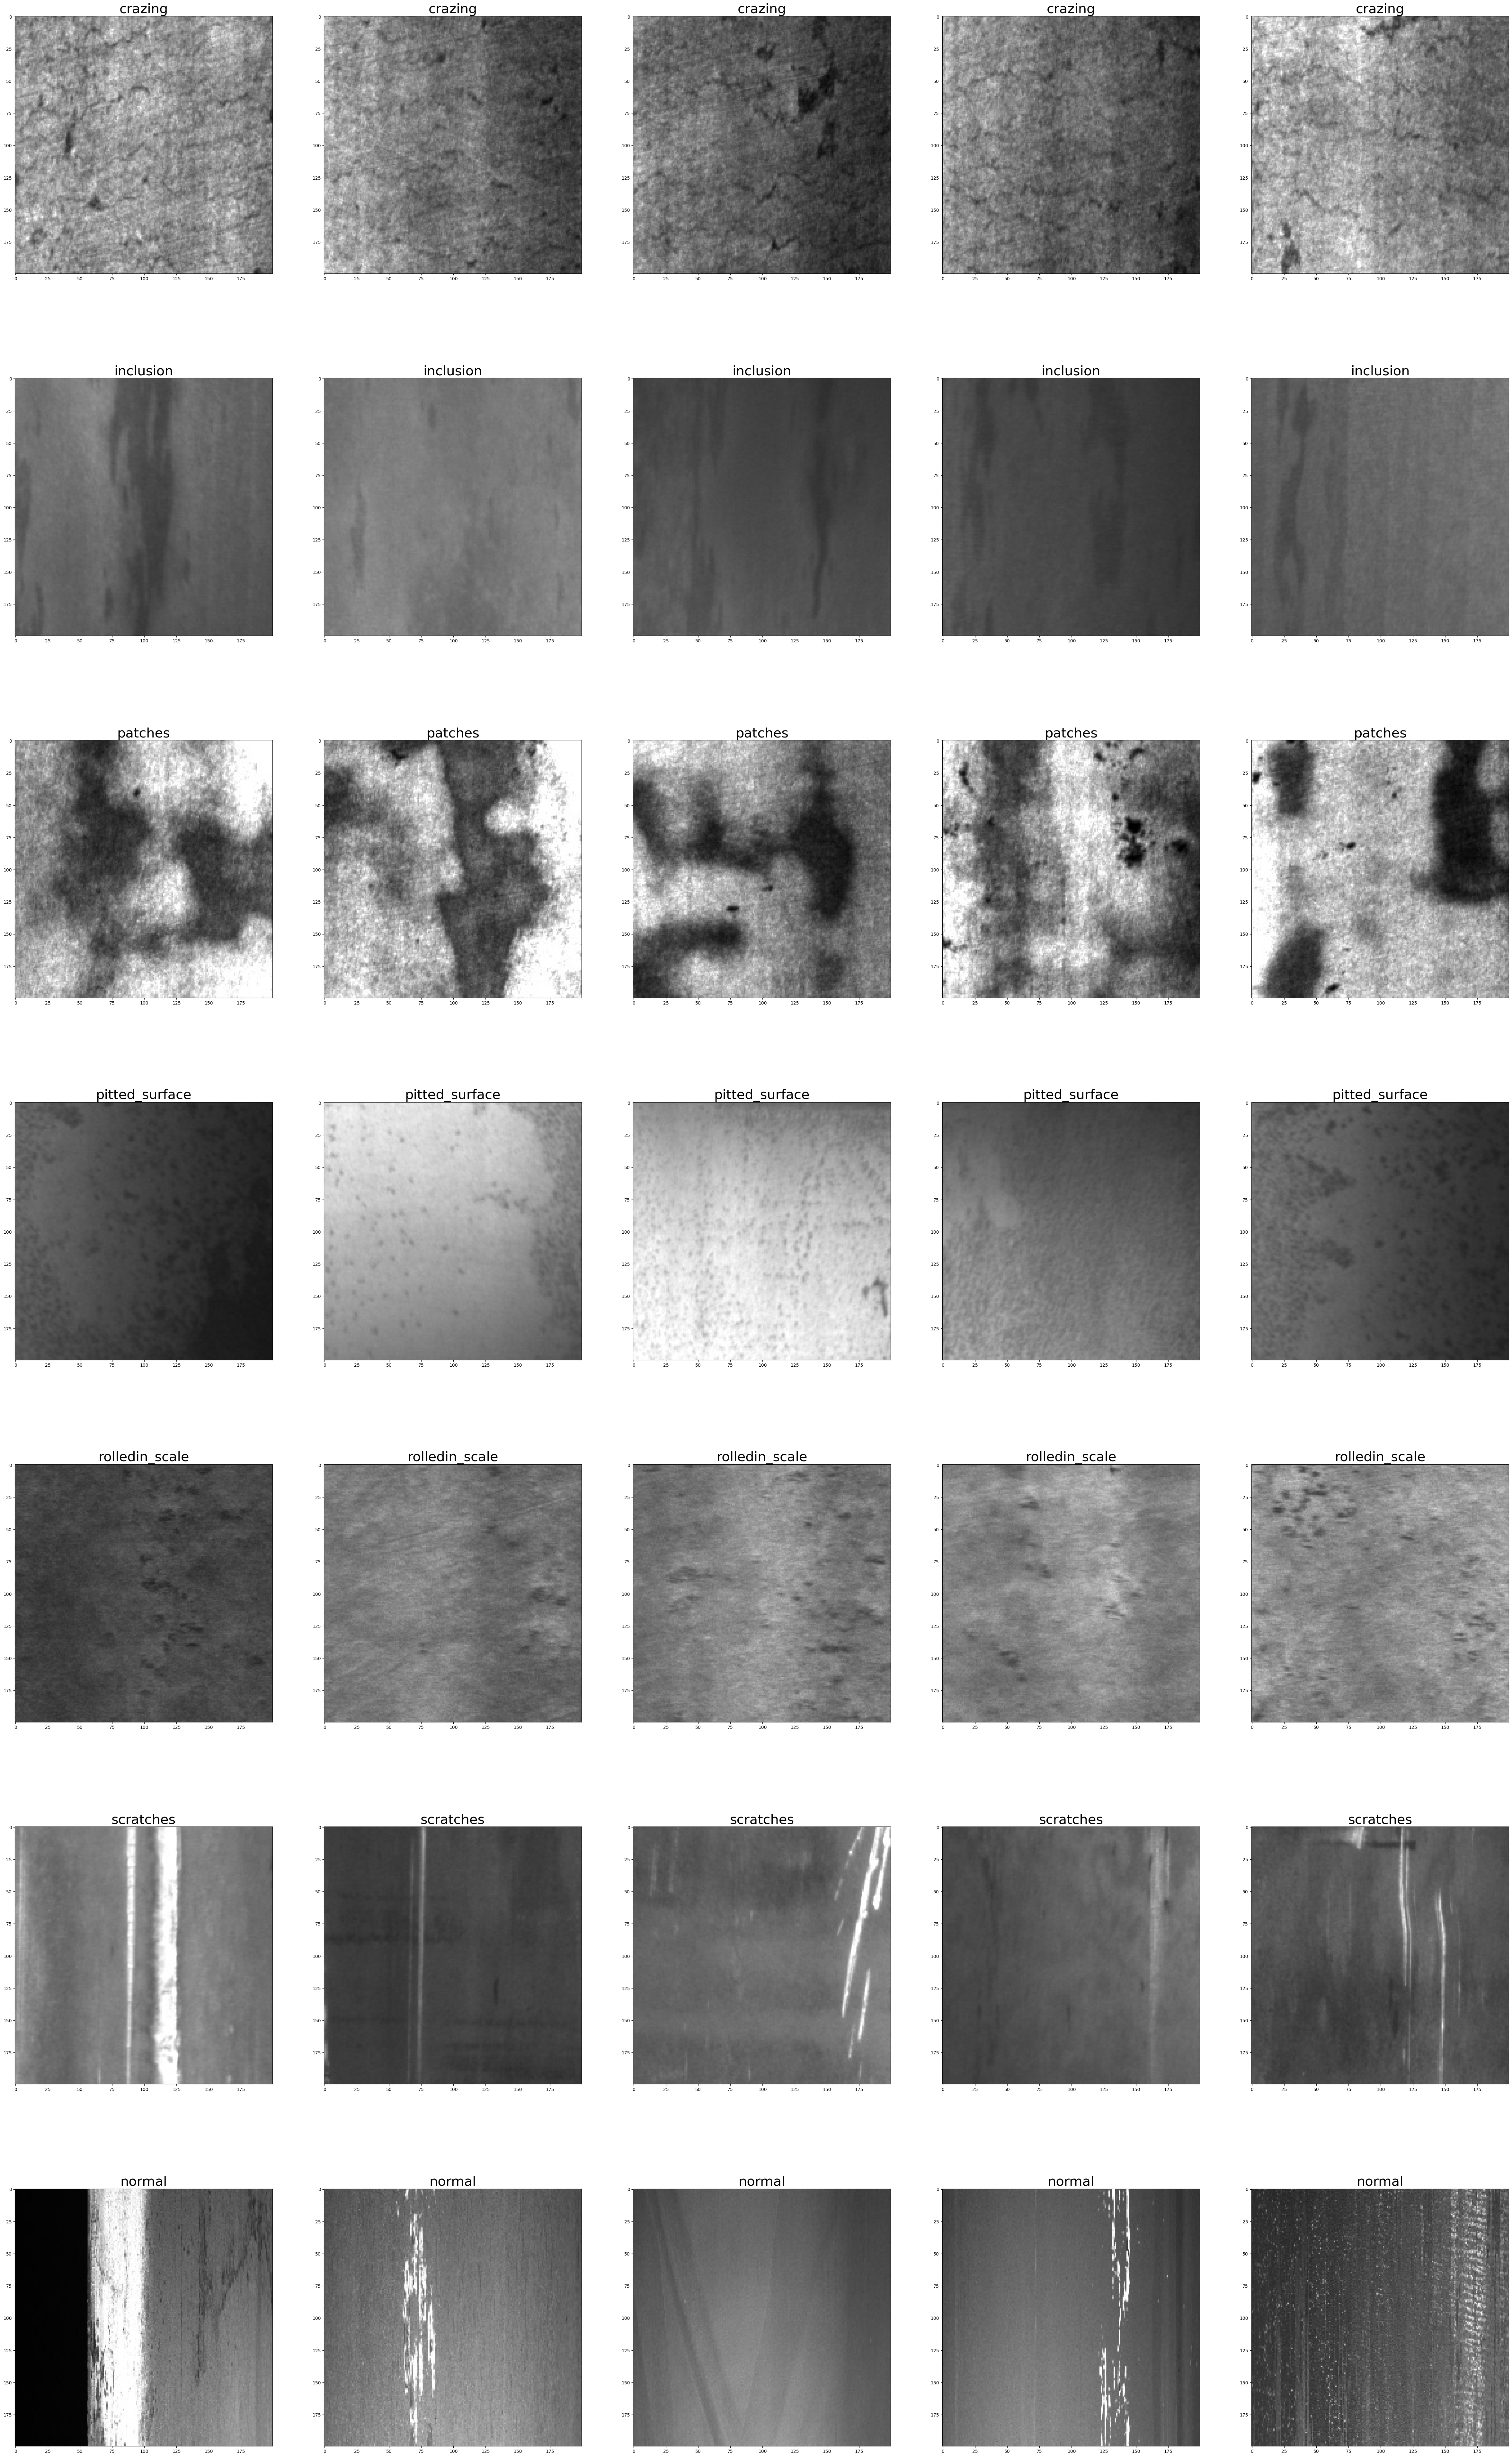

In [109]:
# ランダムにLabel別画像を表示

### ランダムサンプリング
sample_img_path = {}   # label:image_path 形式で表示データを保存
keys = ['crazing','inclusion','patches','pitted_surface','rolledin_scale','scratches','normal']
N = 5   # num of samples from each class

sampled_images = d_train.groupby('label').apply(lambda x: x.sample(n=N))   # ランダムにサンンプリング

for k in keys:
    tmp = sampled_images[sampled_images['label']==k]['images']
    sample_img_path[k] = [os.path.join('tmp', 'prodDefect_classification_6classes_DAI', 'prodDefect_classification_6classes_DAI_Train', 'images', i) for i in tmp]
#sample_img_path

### プロット
fig = plt.figure(figsize=(60, 100))
counter = 1
for k in sample_img_path.keys():
    #print(k)
    for v in sample_img_path[k]:
        #print(v)
        #print(counter)
        ax = fig.add_subplot(7, N, counter)
        ax.set_title(k, fontsize=30)
        im = cv2.imread(v)
        plt.imshow(im)
        counter = counter + 1